## Importing necessary modules

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for plotting 3D plots
from mpl_toolkits.mplot3d.axes3d import Axes3D

# for good 3d representation and color mapping of 3d plots
from matplotlib import cm

#for calculating derivatives of complex functions
from sympy import symbols, diff


## Example 1:  $$f(x) = x^2+2x$$

In [2]:
def f(x):
    return x**2+2*x

In [3]:
def df(x):
    return 2*x+2


**Create data values**

In [4]:
x = np.linspace(start= -3, stop = 3, num=100)

**Plotting data**

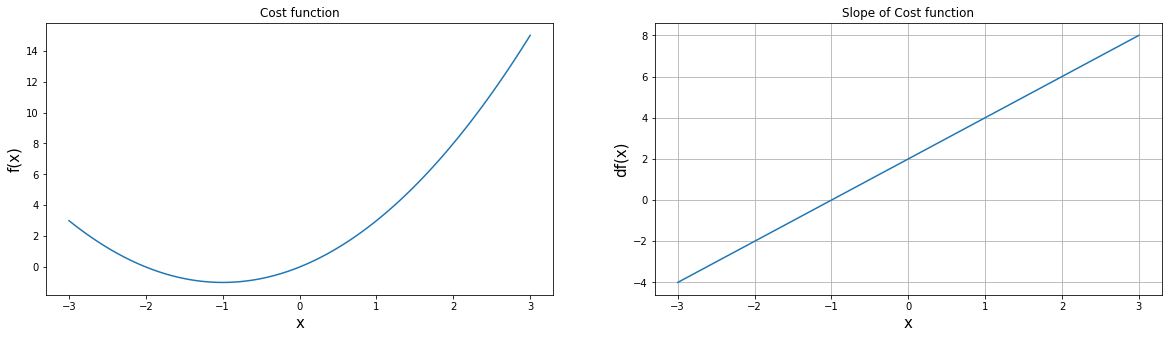

In [5]:
plt.figure(figsize=[20,5])

# plotting cost function f(x)
plt.subplot(1,2,1)
plt.plot(x,f(x))
plt.title('Cost function')
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)

# plotting first derivative of cost function f'(x)
plt.subplot(1,2,2)
plt.plot(x,df(x))
plt.title('Slope of Cost function')
plt.xlabel('x', fontsize=15)
plt.ylabel('df(x)', fontsize=15)
plt.grid()

plt.show()

# Gradient Descent to find local minima

**Gradient Descent Algorithm**

In [6]:
prev_x = 0
new_x = -2 #it's a random starting point 
step_multiplier = 0.1
new_x_list = [new_x]
precision = 0.0001
step_size = 1
counter = 0

while step_size > precision:
    prev_x = new_x
    new_x = prev_x - step_multiplier * df(prev_x)
    step_size = abs(new_x - prev_x)
    new_x_list.append(new_x)
    counter += 1
print('function has local minima as x =',round(new_x_list[-1])  )  
    
    
    
    
    

function has local minima as x = -1


**Plotting data**

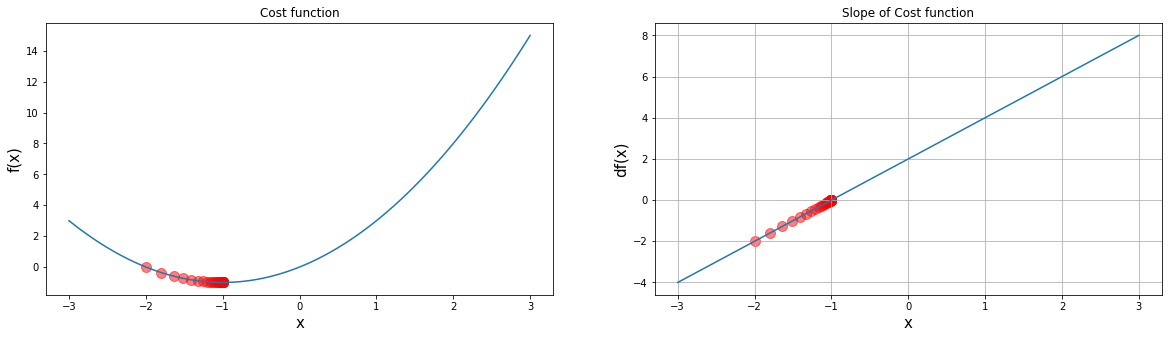

In [7]:
plt.figure(figsize=[20,5])
# plotting cost function f(x) and how gradient descent converges at local minima
plt.subplot(1,2,1)
plt.plot(x,f(x))
plt.title('Cost function')
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)
plt.scatter(np.array(new_x_list), f(np.array(new_x_list)), color='red', alpha=0.5, s= 100) #alpha for transparency

# plotting first derivative of cost function f'(x)and how gradient descent converges at local minima
plt.subplot(1,2,2)
plt.plot(x,df(x))
plt.title('Slope of Cost function')
plt.xlabel('x', fontsize=15)
plt.ylabel('df(x)', fontsize=15)
plt.scatter(np.array(new_x_list), df(np.array(new_x_list)), color='red', alpha=0.5, s= 100) #alpha for transparency
plt.grid()

plt.show()



# Functions with multiple local minima

## Example 2: $$g(x) = x^4-4x^2+5$$

In [8]:
def g(x):
    return x**4-4*x**2+5

def dg(x):
    return 4*x**3-8*x

**Create data values**

In [9]:
x_1 = np.linspace(start=-2, stop=2, num=1000)


# Gradient descent as a python function

In [10]:
def gradient_descent(derivative_func, initial_guess=1, multiplier=0.1, precision=0.0001, max_iter=200):
    
    prev_x = 0
    new_x = initial_guess #it's a random starting point 
    new_x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    step_size = 1
    counter = 0

    while counter < max_iter and step_size > precision:
        prev_x = new_x
        new_x = prev_x - multiplier * derivative_func(prev_x)
        new_x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        step_size = abs(new_x - prev_x)
        counter += 1
        
    return new_x, new_x_list, slope_list
 
    

In [11]:
# calling the gradient descent function

local_min, x_list, deriv_list = gradient_descent(dg, initial_guess=1, multiplier=0.01, precision=0.001, max_iter=30)



**plotting cost function $g(x)$ and derivative function $g'(x)$**

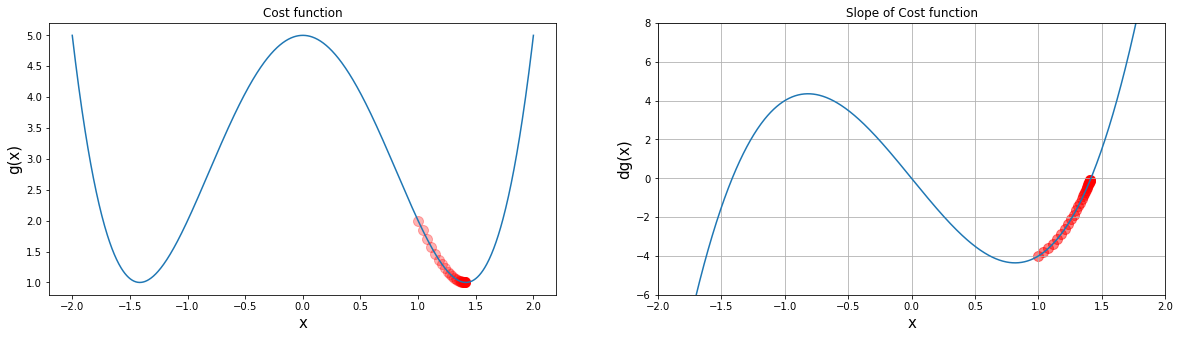

In [12]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.plot(x_1,g(x_1))
plt.title('Cost function')
plt.xlabel('x', fontsize=15)
plt.ylabel('g(x)', fontsize=15)
plt.scatter(np.array(x_list), g(np.array(x_list)), color='red', alpha=0.3, s= 100) #alpha for transparency

plt.subplot(1,2,2)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.plot(x_1,dg(x_1))
plt.title('Slope of Cost function')
plt.xlabel('x', fontsize=15)
plt.ylabel('dg(x)', fontsize=15)
plt.scatter(x_list, deriv_list, color='red', alpha=0.5, s= 100) #alpha for transparency

plt.grid()

plt.show()


## Effect of learning rate (or multiplier) on cost function

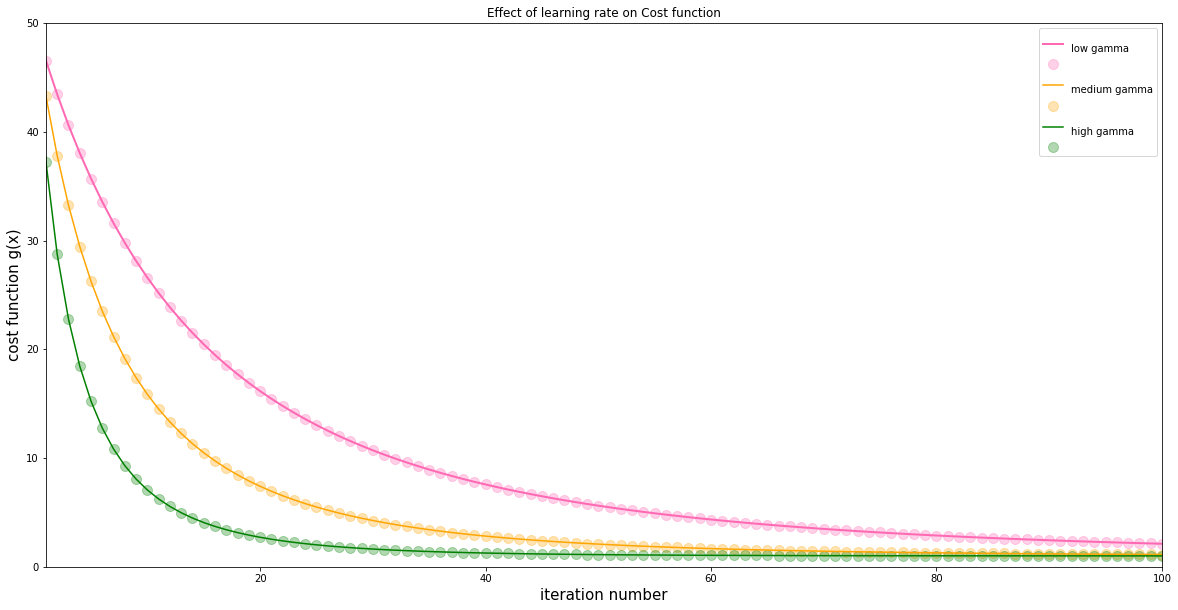

In [13]:
n = 100

# lets get the values for plots

# x-axis data
iteration_list = np.array(list(range(0,n+1,1)))

# y-axis data
# gamma means learning rate , low gamma means when multiplier or learning rate is small say 0.005
low_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)
medium_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# plotting the cost function g(x) vs iteration number
plt.figure(figsize=[20,10])
plt.xlim(1,n)
plt.ylim(0, 50)

plt.title('Effect of learning rate on Cost function')
plt.xlabel('iteration number', fontsize=15)
plt.ylabel('cost function g(x)', fontsize=15)

low_plot = plt.plot(iteration_list, g(np.array(low_gamma[1])), color='hotpink', linewidth=2)
plt.scatter(iteration_list, g(np.array(low_gamma[1])), color='hotpink', alpha=0.3, s= 100)

med_plot = plt.plot(iteration_list, g(np.array(medium_gamma[1])), color='orange')
plt.scatter(iteration_list, g(np.array(medium_gamma[1])), color='orange', alpha=0.3, s= 100)

high_plot = plt.plot(iteration_list, g(np.array(high_gamma[1])), color='green')
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='green', alpha=0.3, s= 100)

plt.legend(['\nlow gamma','', '\nmedium gamma' , '','\nhigh gamma','' ])         

In [14]:
# but using a very high gamma or learning rate or multiplier, can lead to non convergence to a minimum as cost ...
# function keeps on wandering between different values due to big steps.

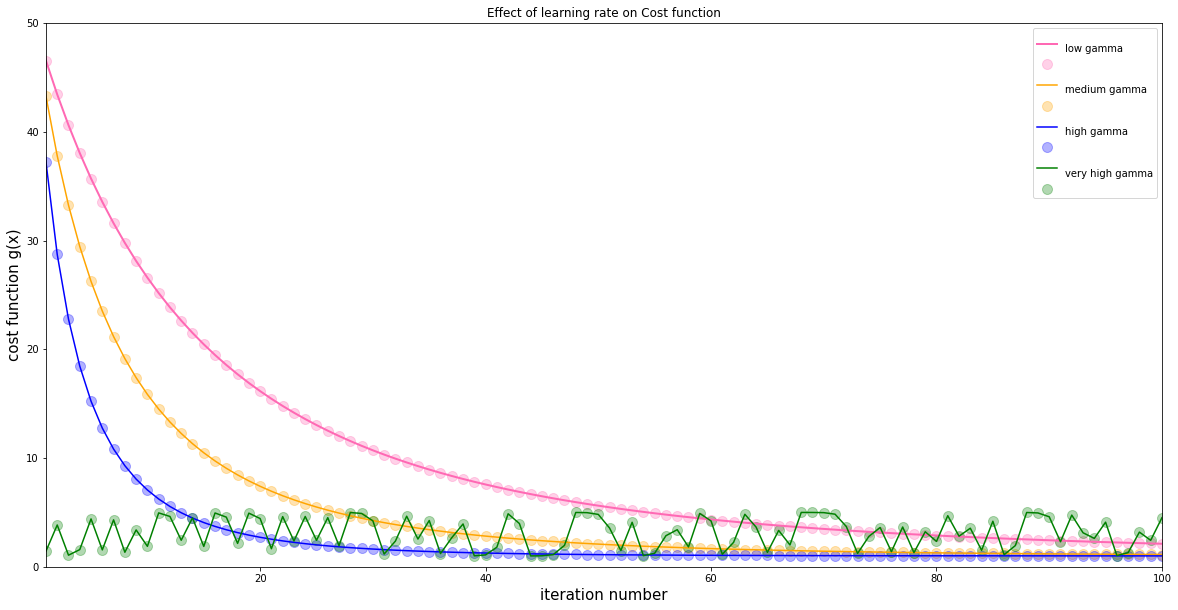

In [15]:
n = 100

# lets get the values for plots

# x-axis data
iteration_list = np.array(list(range(0,n+1,1)))

# y-axis data
# gamma means learning rate , low gamma means when multiplier or learning rate is small say 0.005
low_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)
medium_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)
very_high_gamma = gradient_descent(dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# plotting the cost function g(x) vs iteration number
plt.figure(figsize=[20,10])
plt.xlim(1,n)
plt.ylim(0, 50)

plt.title('Effect of learning rate on Cost function')
plt.xlabel('iteration number', fontsize=15)
plt.ylabel('cost function g(x)', fontsize=15)

low_plot = plt.plot(iteration_list, g(np.array(low_gamma[1])), color='hotpink', linewidth=2)
plt.scatter(iteration_list, g(np.array(low_gamma[1])), color='hotpink', alpha=0.3, s= 100)

med_plot = plt.plot(iteration_list, g(np.array(medium_gamma[1])), color='orange')
plt.scatter(iteration_list, g(np.array(medium_gamma[1])), color='orange', alpha=0.3, s= 100)

high_plot = plt.plot(iteration_list, g(np.array(high_gamma[1])), color='blue')
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='blue', alpha=0.3, s= 100)

very_high_plot = plt.plot(iteration_list, g(np.array(very_high_gamma[1])), color='green')
plt.scatter(iteration_list, g(np.array(very_high_gamma[1])), color='green', alpha=0.3, s= 100)

plt.legend(['\nlow gamma','', '\nmedium gamma' , '','\nhigh gamma','','\nvery high gamma','' ])         

*Even though initial guess taken 1.9 is much closer to true minima of 1.4, very high gamma of 0.25 ends up leading to higher cost function than lower learning rates as evident from above chart.*

## Data Visualisation with 3D charts.

## Example 3: $$ h(x) = \frac{1}{3^{-x^2-y^2}+1}$$

In [16]:
def h(x,y):
    return 1/(3**(-x**2-y**2)+1)

**Create x, y data**

In [17]:
x_3 = np.linspace(start=-2, stop=2, num=200)
y_3 = np.linspace(start=-2, stop=2, num=200)

# plot_surface function requires x,y arguments as 2 dimensional array and not vectors... 
# so we use meshgrid function to convert vector to 2d array.

x_3, y_3 = np.meshgrid(x_3,y_3)

**Generate 3D data plot**

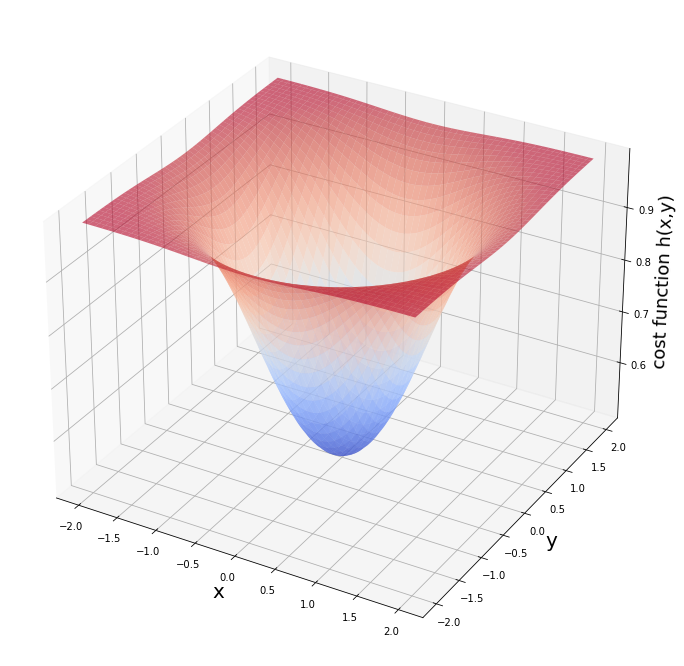

In [18]:
fig = plt.figure(figsize=[16,12])
ax = plt.axes(projection='3d')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('cost function h(x,y)', fontsize=18)
ax.plot_surface(x_3, y_3, h(x_3,y_3), cmap=cm.coolwarm, alpha=0.6)


In [23]:
# assigning variables a,b values equal to x, y 
a,b = symbols('x, y')

In [24]:
print(diff(h(a,b),a))

2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


## gradient descent setup

In [64]:
multiplier =0.1
max_iter = 500
params = np.array([1.8, 1.5]) # initial guess for x is say 1.8 and y is say 1.
x_list = [params[0]]
y_list = [params[1]]
z_list = [h(params[0],params[1])]


for n in range(max_iter):
    gradient_x = diff(h(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(h(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    x_list.append(params[0])
    y_list.append(params[1])
    z_list.append(h(params[0],params[1]))

print('minima is at x, y =', params)
print('gradient at minima=',gradients)
    
    



minima is at x, y = [5.00836852452115e-8 4.17364043710095e-8]
gradient at minima= [2.91103240209117e-8 2.42586033507597e-8]


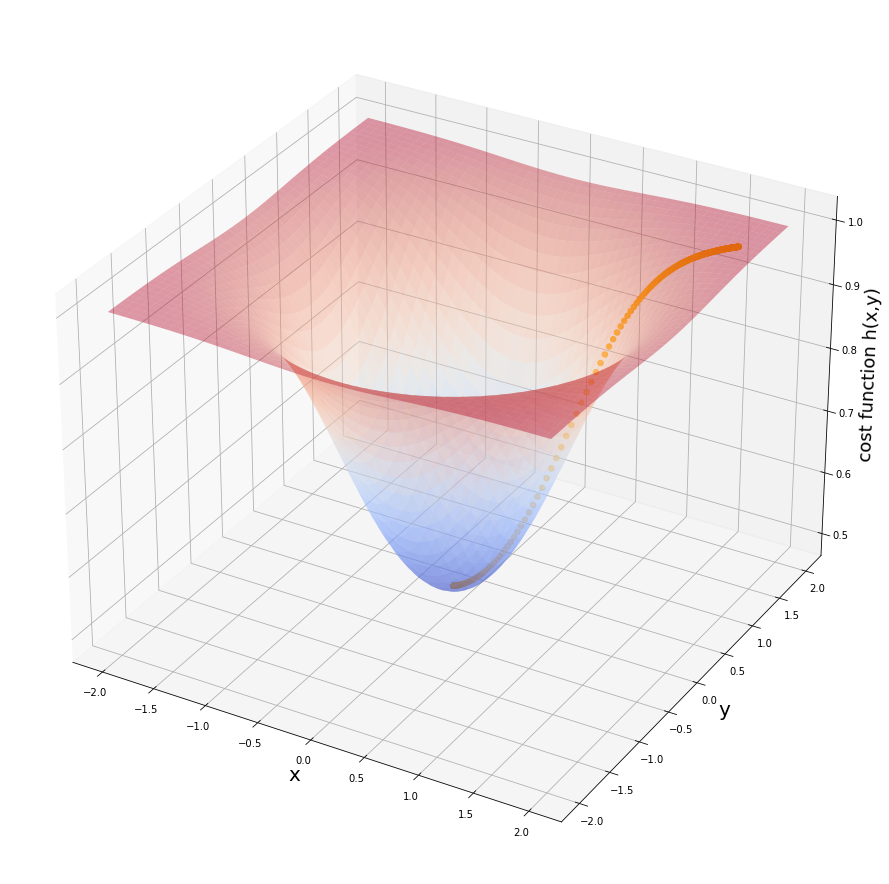

In [65]:
fig = plt.figure(figsize=[16,16])
ax = plt.axes(projection='3d')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('cost function h(x,y)', fontsize=18)
ax.plot_surface(x_3, y_3, h(x_3,y_3), cmap=cm.coolwarm, alpha=0.4)

ax.scatter(np.array(x_list), np.array(y_list),np.array(z_list), color='orange', s=30)